In [10]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [11]:
import os
os.chdir("drive/My Drive")

FileNotFoundError: [Errno 2] No such file or directory: 'drive/My Drive'

In [12]:
os.chdir("Colab Notebooks")

FileNotFoundError: [Errno 2] No such file or directory: 'Colab Notebooks'

In [13]:
drive/My Drive/Colab Notebooks/

SyntaxError: invalid syntax (<ipython-input-13-b45dba0e731f>, line 1)

In [9]:
!pip install scikit-image

In [7]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from skimage.io import imread
import cv2
from PIL import Image
import skimage as sk
import random
print("done")

ModuleNotFoundError: No module named 'skimage'

In [10]:
!pip install numpy==1.16.1

     |████████████████████████████████| 17.3MB 1.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


In [11]:
!pip install numpy Cython
!pip install pymrmr

import pymrmr

     |████████████████████████████████| 71kB 1.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/5b/ce/3a/bc9b80047f68973d909a35bb8e3062b7c7377510607ec35998
Successfully built pymrmr


In [12]:
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 30.6MB 42.7MB/s 
  Found existing installation: opencv-contrib-python 3.4.3.18
    Uninstalling opencv-contrib-python-3.4.3.18:
      Successfully uninstalled opencv-contrib-python-3.4.3.18


In [34]:
train_df= pd.read_csv('train_500.csv')
test_df=pd.read_csv('testing.csv')

In [47]:
#print(train_df.describe())
print(test_df.iloc[2]['ID'])

w_da2efe0


In [ ]:
id=[]
im=[]
feature=[]
for i in range(len(df)):
    img_path = 'train_whale_500/'+df.iloc[i]['Image']
    img = cv2.imread(img_path)
    (means, stds) = cv2.meanStdDev(img)
    stats = np.concatenate([means, stds]).flatten()
    id.append(df.iloc[i]['Id'])
    im.append(df.iloc[i]['Image'])
    feature.append(stats)
    

In [ ]:
d={'Id':id,'Image':im,'mean_std':feature}

In [ ]:
d['mean_std'][0]

array([176.83412876, 176.83412876, 176.83412876,  73.47434705,
        73.47434705,  73.47434705])

In [36]:
fixed_size = tuple((224, 224))

In [ ]:
# id=[]
# im=[]
# mean_std=[]
# colour_histogram=[]
# for i in range(len(train_df))
#     img_path = 'train_whale_500/'+train_df.iloc[i]['Image']
#     print('processing image',i)
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, fixed_size)
#     (means, stds) = cv2.meanStdDev(img)
#     stats1 = np.concatenate([means, stds]).flatten()
#     hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
#     stats2 = hist.flatten()
#     id.append(train_df.iloc[i]['Id'])
#     im.append(train_df.iloc[i]['Image'])
#     mean_std.append(stats1)
#     colour_histogram.append(stats2)

id=[]
im=[]
mean_std=[]
colour_histogram=[]
for i in range(len(test_df)):
    img_path = 'test_data/'+test_df.iloc[i]['Image']
    print('processing image',i)
    img = cv2.imread(img_path)
    img = cv2.resize(img, fixed_size)
    (means, stds) = cv2.meanStdDev(img)
    stats1 = np.concatenate([means, stds]).flatten()
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    stats2 = hist.flatten()
    id.append(test_df.iloc[i]['ID'])
    im.append(test_df.iloc[i]['Image'])
    mean_std.append(stats1)
    colour_histogram.append(stats2)

In [ ]:
d={'Id':id,'Image':im,'mean_std':mean_std,'colour_histogram':colour_histogram}

In [ ]:
#np.save('colour_feature.npy',d)
np.save('test_colour_feature.npy',d)

In [ ]:
a=np.load('colour_feature.npy')

In [ ]:
a[()]['colour_histogram'][0].shape

(512,)

In [ ]:
hist.shape

(8, 8, 8)

In [1]:
# fisher vector representation using gaussian mixture

from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

def fisher_vector(xx, gmm):
    print('processing')
    """Computes the Fisher vector on a set of descriptors.
    Parameters
    ----------
    xx: array_like, shape (N, D) or (D, )
        The set of descriptors
    gmm: instance of sklearn mixture.GMM object
        Gauassian mixture model of the descriptors.
    Returns
    -------
    fv: array_like, shape (K + 2 * D * K, )
        Fisher vector (derivatives with respect to the mixing weights, means
        and variances) of the given descriptors.
    Reference
    ---------
    J. Krapac, J. Verbeek, F. Jurie.  Modeling Spatial Layout with Fisher
    Vectors for Image Categorization.  In ICCV, 2011.
    http://hal.inria.fr/docs/00/61/94/03/PDF/final.r1.pdf
    """
    xx = np.atleast_2d(xx)
    N = xx.shape[0]

    # Compute posterior probabilities.
    Q = gmm.predict_proba(xx)  # NxK

    # Compute the sufficient statistics of descriptors.
    Q_sum = np.sum(Q, 0)[:, np.newaxis] / N
    Q_xx = np.dot(Q.T, xx) / N
    Q_xx_2 = np.dot(Q.T, xx ** 2) / N

    # Compute derivatives with respect to mixing weights, means and variances.
    d_pi = Q_sum.squeeze() - gmm.weights_
    d_mu = Q_xx - Q_sum * gmm.means_
    d_sigma = (
        - Q_xx_2
        - Q_sum * gmm.means_ ** 2
        + Q_sum * gmm.covariances_
        + 2 * Q_xx * gmm.means_)

    # Merge derivatives into a vector.
    return np.hstack((d_pi, d_mu.flatten(), d_sigma.flatten()))



ModuleNotFoundError: No module named 'sklearn'

In [ ]:
K = 64
stkfeature=[]
stdfeature=[]
im=[]
id=[]
    
sift = cv2.xfeatures2d.SIFT_create()
    
fixed_size = tuple((224, 224))
    
# for i in range(len(train_df)):
#     img_path = 'train_whale_500/'+train_df.iloc[i]['Image']
#     print('processing image',i)
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, fixed_size)
#     gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
#     kp, des = sift.detectAndCompute(gray,None)
        
#     stdfeature.append(des)
#     stkfeature.append(kp)
       
# array=stdfeature[0]
# for j in range(2,len(train_df)):
#     np.concatenate((array,stdfeature[j]), axis=0)
# print(array.shape)
# gmm = GaussianMixture(n_components=K, covariance_type='diag')
# gmm.fit(array)

for i in range(len(test_df)):
    img_path = 'test_data/'+test_df.iloc[i]['Image']
    print('processing image',i)
    img = cv2.imread(img_path)
    img = cv2.resize(img, fixed_size)
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
    kp, des = sift.detectAndCompute(gray,None)
        
    stdfeature.append(des)
    stkfeature.append(kp)
       
array=stdfeature[0]
for j in range(2,len(test_df)):
    np.concatenate((array,stdfeature[j]), axis=0)
print(array.shape)
gmm = GaussianMixture(n_components=K, covariance_type='diag')
gmm.fit(array)

In [24]:
img_path = 'test_data/'+test_df.iloc[199]['Image']
print('processing image')
img = cv2.imread(img_path)
img = cv2.resize(img, fixed_size)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
kp, des = sift.detectAndCompute(gray,None)
feature=fisher_vector(des, gmm)
print(feature)
print(len(feature))
print(feature.shape)

processing image
processing
[ 0.00426017 -0.00929826  0.02387459 ...  0.03649636  0.05433904
 -3.44079488]
16448
(16448,)


In [ ]:
# im1=[]
# id1=[]
# sift_feature=[]
# for i in range(len(train_df)):
#     img_path = 'train_whale_500/'+train_df.iloc[i]['Image']
#     print('processing image',i)
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, fixed_size)
#     gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
#     kp, des = sift.detectAndCompute(gray,None)
#     feature=fisher_vector(des, gmm)
  
#     im1.append(train_df.iloc[i]['Image'])
#     id1.append(train_df.iloc[i]['Id'])
#     sift_feature.append(feature)

im1=[]
id1=[]
sift_feature=[]
for i in range(len(test_df)):
    img_path = 'test_data/'+test_df.iloc[i]['Image']
    print('processing image')
    img = cv2.imread(img_path)
    img = cv2.resize(img, fixed_size)
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
    kp, des = sift.detectAndCompute(gray,None)
    feature=fisher_vector(des, gmm)
  
    im1.append(test_df.iloc[i]['Image'])
    id1.append(test_df.iloc[i]['ID'])
    sift_feature.append(feature)

In [27]:
sift_feature[0].shape

(16448,)

In [ ]:
######################################
# surf feature extraction and converting into 1D vector fisher vector
######################################

In [262]:
K = 64
stkfeature=[]
stdfeature=[]

    
surf = cv2.xfeatures2d.SURF_create()
    
fixed_size = tuple((224, 224))

# ######################################
# # training gaussian mixture with training data 
# ######################################
    
# for i in range(len(train_df)):
#     img_path = 'train_whale_500/'+train_df.iloc[i]['Image']
#     print('processing image',i)
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, fixed_size)
#     gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
#     kp, des = surf.detectAndCompute(gray,None)
        
# #     stdfeature.append(des)
# #     stkfeature.append(kp)

# ######################################
# # limiting the number of descriptor to 200
# ######################################

#     stdfeature.append(des[:200])
#     stkfeature.append(kp[:200])
       
# array=stdfeature[0]
# for j in range(2,len(train_df)):
#     np.concatenate((array,stdfeature[j]), axis=0)
# print(array.shape)
# gmm = GaussianMixture(n_components=K, covariance_type='diag')
# gmm.fit(array)



######################################
# training gaussian mixture with testing data 
######################################

for i in range(len(test_df)):
    img_path = 'test_data/'+test_df.iloc[i]['Image']
    print('processing image',i)
    img = cv2.imread(img_path)
    img = cv2.resize(img, fixed_size)
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
    kp, des = surf.detectAndCompute(gray,None)
#     stdfeature.append(des)
#     stkfeature.append(kp)

######################################
# limiting the number of descriptor to 200
######################################

    stdfeature.append(des[:200])
    stkfeature.append(kp[:200])
        
array=stdfeature[0]
for j in range(2,len(test_df)):
    np.concatenate((array,stdfeature[j]), axis=0)
print(array.shape)
gmm = GaussianMixture(n_components=K, covariance_type='diag')
gmm.fit(array)

processing image 0
processing image 1
processing image 2
processing image 3
processing image 4
processing image 5
processing image 6
processing image 7
processing image 8
processing image 9
processing image 10
processing image 11
processing image 12
processing image 13
processing image 14
processing image 15
processing image 16
processing image 17
processing image 18
processing image 19
processing image 20
processing image 21
processing image 22
processing image 23
processing image 24
processing image 25
processing image 26
processing image 27
processing image 28
processing image 29
processing image 30
processing image 31
processing image 32
processing image 33
processing image 34
processing image 35
processing image 36
processing image 37
processing image 38
processing image 39
processing image 40
processing image 41
processing image 42
processing image 43
processing image 44
processing image 45
processing image 46
processing image 47
processing image 48
processing image 49
processing

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=64, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [263]:
######################################
# calculating fisher vector for surf training data 
######################################



# im2=[]
# id2=[]
# surf_feature=[]
# for i in range(len(train_df)):
#     img_path = 'train_whale_500/'+train_df.iloc[i]['Image']
#     print('processing image',i)
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, fixed_size)
#     gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
#     kp, des = surf.detectAndCompute(gray,None)
# #     feature=fisher_vector(des, gmm)
#     feature=fisher_vector(des[:200], gmm) # limiting the number of descriptor 
  
#     im2.append(train_df.iloc[i]['Image'])
#     id2.append(train_df.iloc[i]['Id'])
#     surf_feature.append(feature)


######################################
# calculating fisher vector for surf testing data  
######################################
    
im2=[]
id2=[]
surf_feature=[]


for i in range(len(test_df)):
    img_path = 'test_data/'+test_df.iloc[i]['Image']
    print('processing image')
    img = cv2.imread(img_path)
    img = cv2.resize(img, fixed_size)
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
    kp, des = surf.detectAndCompute(gray,None)
#     feature=fisher_vector(des, gmm)
    feature=fisher_vector(des[:200], gmm)
    
  
    im2.append(test_df.iloc[i]['Image'])
    id2.append(test_df.iloc[i]['ID'])
    surf_feature.append(feature)

processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
pro

In [ ]:
######################################
# orb feature extraction and converting into 1D vector fisher vector
######################################

In [264]:
K = 64
stkfeature=[]
stdfeature=[]

    
orb = cv2.ORB_create()
    
fixed_size = tuple((224, 224))

######################################
# training gaussian mixture with training data 
######################################
    
# for i in range(len(train_df)):
#     img_path = 'train_whale_500/'+train_df.iloc[i]['Image']
#     print('processing image',i)
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, fixed_size)
#     gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
#     kp, des = orb.detectAndCompute(gray,None)
        
# #     stdfeature.append(des)
# #     stkfeature.append(kp)
# ######################################
# # limiting the number of descriptor to 200
# ######################################    
#     stdfeature.append(des[:200])
#     stkfeature.append(kp[:200])
    

       
# array=stdfeature[0]
# for j in range(2,len(train_df)):
#     np.concatenate((array,stdfeature[j]), axis=0)
# print(array.shape)
# gmm = GaussianMixture(n_components=K, covariance_type='diag')
# gmm.fit(array)

######################################
# training gaussian mixture with training data 
######################################

for i in range(len(test_df)):
    img_path = 'test_data/'+test_df.iloc[i]['Image']
    print('processing image',i)
    img = cv2.imread(img_path)
    img = cv2.resize(img, fixed_size)
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
    kp, des = orb.detectAndCompute(gray,None)
        
#     stdfeature.append(des)
#     stkfeature.append(kp)
    
######################################
# limiting the number of descriptor to 200
######################################    
    stdfeature.append(des[:200])
    stkfeature.append(kp[:200])
       
array=stdfeature[0]
for j in range(2,len(test_df)):
    np.concatenate((array,stdfeature[j]), axis=0)
print(array.shape)
gmm = GaussianMixture(n_components=K, covariance_type='diag')
gmm.fit(array)

processing image 0
processing image 1
processing image 2
processing image 3
processing image 4
processing image 5
processing image 6
processing image 7
processing image 8
processing image 9
processing image 10
processing image 11
processing image 12
processing image 13
processing image 14
processing image 15
processing image 16
processing image 17
processing image 18
processing image 19
processing image 20
processing image 21
processing image 22
processing image 23
processing image 24
processing image 25
processing image 26
processing image 27
processing image 28
processing image 29
processing image 30
processing image 31
processing image 32
processing image 33
processing image 34
processing image 35
processing image 36
processing image 37
processing image 38
processing image 39
processing image 40
processing image 41
processing image 42
processing image 43
processing image 44
processing image 45
processing image 46
processing image 47
processing image 48
processing image 49
processing

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=64, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
img_path = 'train_whale_500/'+df.iloc[1]['Image']
print('processing image')
img = cv2.imread(img_path)
img = cv2.resize(img, fixed_size)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
kp, des = orb.detectAndCompute(gray,None)
feature=fisher_vector(des, gmm)
print(feature)
print(len(feature))
print(feature.shape)

processing image
processing
[-6.28446710e-03 -4.65292767e-03 -2.06256968e-02 ...  1.15715737e-44
  1.11926960e-44  8.25867943e-45]
4160
(4160,)


In [265]:
######################################
# calculating fisher vector for orb training  data  
######################################



# im3=[]
# id3=[]
# orb_feature=[]
# for i in range(len(train_df)):
#     img_path = 'train_whale_500/'+train_df.iloc[i]['Image']
#     print('processing image',i)
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, fixed_size)
#     gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
#     kp, des = orb.detectAndCompute(gray,None)
# #     feature=fisher_vector(des, gmm)
#     feature=fisher_vector(des[:200], gmm)
  
#     im3.append(train_df.iloc[i]['Image'])
#     id3.append(train_df.iloc[i]['Id'])
#     orb_feature.append(feature)
 
    
######################################
# calculating fisher vector for orb testing data  
######################################
im3=[]
id3=[]
orb_feature=[]   
    
for i in range(len(test_df)):
    img_path = 'test_data/'+test_df.iloc[i]['Image']
    print('processing image')
    img = cv2.imread(img_path)
    img = cv2.resize(img, fixed_size)
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
    kp, des = orb.detectAndCompute(gray,None)
#     feature=fisher_vector(des, gmm)
    feature=fisher_vector(des[:200], gmm)
  
    im3.append(test_df.iloc[i]['Image'])
    id3.append(test_df.iloc[i]['ID'])
    orb_feature.append(feature)

processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
processing
processing image
pro

In [259]:
print(surf_feature[0])
print(surf_feature[0].shape)

[-1.12757026e-17 -1.12757026e-17 -6.93889390e-18 ...  5.00000000e-09
  5.00000000e-09  5.00000000e-09]
(8256,)


In [258]:
print(sift_feature[0])
print(sift_feature[0].shape)

NameError: name 'sift_feature' is not defined

In [260]:
print(orb_feature[0])
print(orb_feature[0].shape)

[-1.12757026e-17 -1.21430643e-17 -1.12757026e-17 ...  2.66240000e+02
  5.37600000e+01  3.44320000e+02]
(4160,)


In [ ]:
x={'Id':id3,'Image':im3,'orb':orb_feature,'surf':surf_feature,'sift':sift_feature}
#np.save('shape_feature.npy',x)

#np.save('test_shape_feature.npy',x)

In [266]:
x={'Id':id3,'Image':im3,'orb':orb_feature,'surf':surf_feature}
# np.save('shape_feature1.npy',x)
np.save('test_shape_feature1.npy',x)

In [2]:
a1=np.load('shape_feature.npy')
a2=np.load('test_shape_feature.npy')


b1=np.load('colour_feature.npy')
b2=np.load('test_colour_feature.npy')

c1=np.load('lbp_feature.npy')
c2=np.load('test_lbp_feature.npy')

d1=np.load('shape_feature1.npy')
d2=np.load('test_shape_feature1.npy')



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler



train_labels=[]
train_feature1=[]
train_feature2=[]
for i in range(1850):
    train_labels.append(a1[()]['Id'][i])
    train_feature1.append(np.array(b1[()]['mean_std'][i]))
    train_feature2.append(np.array(b1[()]['colour_histogram'][i]))

In [ ]:
train_feature=[]
for i in range(1850):
    train_feature.append(np.concatenate((train_feature1[i],train_feature2[i])))
  
test_labels=[]
test_feature=[]
for i in range(200):
    test_labels.append(b2[()]['Id'][i])
    test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i])))

In [58]:
print("[STATUS] feature vector size {}".format(np.array(train_feature).shape))

print("[STATUS] training Labels {}".format(np.array(train_labels).shape))


targetNames = np.unique(train_labels)
le = LabelEncoder()
target = le.fit_transform(train_labels)
print("[STATUS] training labels encoded...")


from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(train_feature,target)

result=knn.predict(test_feature)


[STATUS] feature vector size (1850, 518)
[STATUS] training Labels (1850,)
[STATUS] training labels encoded...


In [66]:
#print(result)
prediction=[]
for i in result:
    prediction.append(le.inverse_transform([i]))

count =0
print(prediction[0][0])
for i in range(len(prediction)):
    if prediction[i][0]==test_labels[i]:
        count+=1
print(count/200)

w_e15442c
0.765


In [ ]:
train_labels=[]
train_feature1=[]
train_feature2=[]
train_feature3=[]
for i in range(1850):
    train_labels.append(a1[()]['Id'][i])
    train_feature1.append(np.array(a1[()]['sift'][i]))
    train_feature2.append(np.array(a1[()]['surf'][i]))
    train_feature3.append(np.array(a1[()]['orb'][i]))
    


# train_feature=[]
# for i in range(1850):
#   train_feature.append(np.concatenate((train_feature1[i],train_feature2[i])))
  


In [156]:
test_labels=[]
test_feature1=[]
test_feature2=[]
test_feature3=[]
for i in range(200):
    test_labels.append(a2[()]['Id'][i])
    test_feature1.append(np.array(a2[()]['sift'][i]))
    test_feature2.append(np.array(a2[()]['surf'][i]))
    test_feature3.append(np.array(a2[()]['orb'][i]))
    
    
print("[STATUS] feature vector size {}".format(np.array(train_feature).shape))

print("[STATUS] training Labels {}".format(np.array(train_labels).shape))


targetNames = np.unique(train_labels)
le = LabelEncoder()
target = le.fit_transform(train_labels)
print("[STATUS] training labels encoded...")


from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(train_feature1,target)

result=knn.predict(test_feature1)
prediction=[]
for i in result:
    prediction.append(le.inverse_transform([i]))

count =0
print(prediction[0][0])
for i in range(200):
    if prediction[i][0]==test_labels[i]:
        count+=1
print('Accuracy with sift features:',count/200)


knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(train_feature2,target)

result=knn.predict(test_feature2)
prediction=[]
for i in result:
    prediction.append(le.inverse_transform([i]))

count =0
print(prediction[0][0])
for i in range(200):
    if prediction[i][0]==test_labels[i]:
        count+=1
print('Accuracy with surf features:',count/200)




knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(train_feature3,target)

result=knn.predict(test_feature3)
prediction=[]
for i in result:
    prediction.append(le.inverse_transform([i]))

count =0
print(prediction[0][0])
for i in range(200):
    if prediction[i][0]==test_labels[i]:
        count+=1
print('Accuracy with orb features:',count/200)

# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(1000), random_state=1)
# clf.fit(train_feature1,target)                         
# result=clf.predict(test_feature1)
# prediction=[]
# for j in result:
#   prediction.append(le.inverse_transform([j]))
  
# count =0
# for j in range(200):
#   if prediction[j][0]==test_labels[j]:
#     count+=1
# print('Accuracy with sift features with mlp i',count/200)


train_feature=[]
for i in range(1850):
    train_feature.append(np.concatenate((b1[()]['mean_std'][i],b1[()]['colour_histogram'][i],a1[()]['sift'][i])))
  

test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(b2[()]['Id'][i])
  test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i],a2[()]['sift'][i])))



from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(train_feature,target)

result=knn.predict(test_feature)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with sift features with colour features:',count/200)



train_feature=[]
for i in range(1850):
  train_feature.append(np.concatenate((b1[()]['mean_std'][i],b1[()]['colour_histogram'][i],a1[()]['surf'][i])))
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(b2[()]['Id'][i])
  test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i],a2[()]['surf'][i])))
  
  

knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(train_feature,target)

result=knn.predict(test_feature)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with surf features with colour features:',count/200)



train_feature=[]
for i in range(1850):
  train_feature.append(np.concatenate((b1[()]['mean_std'][i],b1[()]['colour_histogram'][i],a1[()]['orb'][i])))
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(b2[()]['Id'][i])
  test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i],a2[()]['orb'][i])))



knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(train_feature,target)

result=knn.predict(test_feature)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
    if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with orb features with colour features:',count/200)






[STATUS] feature vector size (1850, 14)
[STATUS] training Labels (1850,)
[STATUS] training labels encoded...
w_e15442c
Accuracy with sift features: 0.005
w_e15442c
Accuracy with surf features: 0.005
w_e15442c
Accuracy with orb features: 0.005
w_e15442c
Accuracy with sift features with colour features: 0.77
w_e15442c
Accuracy with surf features with colour features: 0.765
w_e15442c
Accuracy with orb features with colour features: 0.045


In [158]:
train_feature=[]
for i in range(1850):
  train_feature.append(c1[()]['lbp'][i])
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(c2[()]['Id'][i])
  test_feature.append(c2[()]['lbp'][i])



knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(train_feature,target)

result=knn.predict(test_feature)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with lbp features:',count/200)





train_feature=[]
for i in range(1850):
  train_feature.append(np.concatenate((b1[()]['mean_std'][i],b1[()]['colour_histogram'][i],c1[()]['lbp'][i])))
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(b2[()]['Id'][i])
  test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i],c2[()]['lbp'][i])))



knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(train_feature,target)

result=knn.predict(test_feature)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with lbp features with colour features:',count/200)




w_e15442c
Accuracy with lbp features: 0.115
w_e15442c
Accuracy with lbp features with colour features: 0.78


In [159]:
train_feature=[]
for i in range(1850):
  train_feature.append(np.concatenate((b1[()]['mean_std'][i],b1[()]['colour_histogram'][i],a1[()]['sift'][i],c1[()]['lbp'][i])))
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(b2[()]['Id'][i])
  test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i],a2[()]['sift'][i],c2[()]['lbp'][i])))



from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(train_feature,target)

result=knn.predict(test_feature)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with sift features + colour features + lbp :',count/200)



train_feature=[]
for i in range(1850):
  train_feature.append(np.concatenate((b1[()]['mean_std'][i],b1[()]['colour_histogram'][i],a1[()]['surf'][i],c1[()]['lbp'][i])))
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(b2[()]['Id'][i])
  test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i],a2[()]['surf'][i],c2[()]['lbp'][i])))
  
  

knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(train_feature,target)

result=knn.predict(test_feature)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with surf features + colour features + lbp:',count/200)



train_feature=[]
for i in range(1850):
  train_feature.append(np.concatenate((b1[()]['mean_std'][i],b1[()]['colour_histogram'][i],a1[()]['orb'][i],c1[()]['lbp'][i])))
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(b2[()]['Id'][i])
  test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i],a2[()]['orb'][i],c2[()]['lbp'][i])))



knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(train_feature,target)

result=knn.predict(test_feature)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with orb features + colour features + lbp  :',count/200)



w_e15442c
Accuracy with sift features + colour features + lbp : 0.78
w_e15442c
Accuracy with surf features + colour features + lbp: 0.78
w_e15442c
Accuracy with orb features + colour features + lbp  : 0.05


In [164]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)




from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=1)

clf = clf.fit(train_feature1,target)
model= SelectFromModel(clf, prefit=True)
train_new = model.transform(train_feature1)

test_new= model.transform(test_feature1)
#print(train_new)
knn.fit(train_new,target)

result=knn.predict(test_new)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with sift features:',count/200)



w_e15442c
Accuracy with sift features: 0.005


In [168]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)




from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=1)

clf = clf.fit(train_feature1,target)
model= SelectFromModel(clf, prefit=True)
train_new = model.transform(train_feature1)
test_new= model.transform(test_feature1)
knn.fit(train_new,target)

result=knn.predict(test_new)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with sift features:',count/200)


knn= KNeighborsClassifier(n_neighbors=1)

clf = clf.fit(train_feature2,target)
model= SelectFromModel(clf, prefit=True)
train_new = model.transform(train_feature2)
test_new= model.transform(test_feature2)

knn.fit(train_new,target)


result=knn.predict(test_new)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with surf features:',count/200)




knn= KNeighborsClassifier(n_neighbors=1)

clf = clf.fit(train_feature3,target)
model= SelectFromModel(clf, prefit=True)
train_new = model.transform(train_feature3)
test_new= model.transform(test_feature3)

knn.fit(train_new,target)

result=knn.predict(test_new)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with orb features:',count/200)

# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(1000), random_state=1)
# clf.fit(train_feature1,target)                         
# result=clf.predict(test_feature1)
# prediction=[]
# for j in result:
#   prediction.append(le.inverse_transform([j]))
  
# count =0
# for j in range(200):
#   if prediction[j][0]==test_labels[j]:
#     count+=1
# print('Accuracy with sift features with mlp i',count/200)


train_feature=[]
for i in range(1850):
  train_feature.append(np.concatenate((b1[()]['mean_std'][i],b1[()]['colour_histogram'][i],a1[()]['sift'][i])))
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(b2[()]['Id'][i])
  test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i],a2[()]['sift'][i])))



from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=1)

clf = clf.fit(train_feature,target)
model= SelectFromModel(clf, prefit=True)
train_new = model.transform(train_feature)
test_new= model.transform(test_feature)



knn.fit(train_new,target)

result=knn.predict(test_new)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with sift features with colour features:',count/200)



train_feature=[]
for i in range(1850):
  train_feature.append(np.concatenate((b1[()]['mean_std'][i],b1[()]['colour_histogram'][i],a1[()]['surf'][i])))
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(b2[()]['Id'][i])
  test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i],a2[()]['surf'][i])))
  
  

knn= KNeighborsClassifier(n_neighbors=1)

clf = clf.fit(train_feature,target)
model= SelectFromModel(clf, prefit=True)
train_new = model.transform(train_feature)
test_new= model.transform(test_feature)


knn.fit(train_new,target)

result=knn.predict(test_new)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with surf features with colour features:',count/200)



train_feature=[]
for i in range(1850):
  train_feature.append(np.concatenate((b1[()]['mean_std'][i],b1[()]['colour_histogram'][i],a1[()]['orb'][i])))
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(b2[()]['Id'][i])
  test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i],a2[()]['orb'][i])))



knn= KNeighborsClassifier(n_neighbors=1)

clf = clf.fit(train_feature,target)
model= SelectFromModel(clf, prefit=True)
train_new = model.transform(train_feature)
test_new= model.transform(test_feature)


knn.fit(train_new,target)

result=knn.predict(test_new)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with orb features with colour features:',count/200)





train_feature=[]
for i in range(1850):
  train_feature.append(c1[()]['lbp'][i])
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(c2[()]['Id'][i])
  test_feature.append(c2[()]['lbp'][i])



knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(train_feature,target)

result=knn.predict(test_feature)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with lbp features:',count/200)





train_feature=[]
for i in range(1850):
  train_feature.append(np.concatenate((b1[()]['mean_std'][i],b1[()]['colour_histogram'][i],c1[()]['lbp'][i])))
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(b2[()]['Id'][i])
  test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i],c2[()]['lbp'][i])))



knn= KNeighborsClassifier(n_neighbors=1)
clf = clf.fit(train_feature,target)
model= SelectFromModel(clf, prefit=True)
train_new = model.transform(train_feature)
test_new= model.transform(test_feature)


knn.fit(train_new,target)

result=knn.predict(test_new)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with lbp features with colour features:',count/200)



train_feature=[]
for i in range(1850):
  train_feature.append(np.concatenate((b1[()]['mean_std'][i],b1[()]['colour_histogram'][i],a1[()]['sift'][i],c1[()]['lbp'][i])))
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(b2[()]['Id'][i])
  test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i],a2[()]['sift'][i],c2[()]['lbp'][i])))



from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=1)


clf = clf.fit(train_feature,target)
model= SelectFromModel(clf, prefit=True)
train_new = model.transform(train_feature)
test_new= model.transform(test_feature)

knn.fit(train_new,target)

result=knn.predict(test_new)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with sift features + colour features + lbp :',count/200)



train_feature=[]
for i in range(1850):
  train_feature.append(np.concatenate((b1[()]['mean_std'][i],b1[()]['colour_histogram'][i],a1[()]['surf'][i],c1[()]['lbp'][i])))
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(b2[()]['Id'][i])
  test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i],a2[()]['surf'][i],c2[()]['lbp'][i])))
  
  

knn= KNeighborsClassifier(n_neighbors=1)


clf = clf.fit(train_feature,target)
model= SelectFromModel(clf, prefit=True)
train_new = model.transform(train_feature)
test_new= model.transform(test_feature)

knn.fit(train_new,target)

result=knn.predict(test_new)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with surf features + colour features + lbp:',count/200)



train_feature=[]
for i in range(1850):
  train_feature.append(np.concatenate((b1[()]['mean_std'][i],b1[()]['colour_histogram'][i],a1[()]['orb'][i],c1[()]['lbp'][i])))
  
test_labels=[]
test_feature=[]
for i in range(200):
  test_labels.append(b2[()]['Id'][i])
  test_feature.append(np.concatenate((b2[()]['mean_std'][i],b2[()]['colour_histogram'][i],a2[()]['orb'][i],c2[()]['lbp'][i])))



knn= KNeighborsClassifier(n_neighbors=1)

clf = clf.fit(train_feature,target)
model= SelectFromModel(clf, prefit=True)
train_new = model.transform(train_feature)
test_new= model.transform(test_feature)

knn.fit(train_new,target)

result=knn.predict(test_new)
prediction=[]
for i in result:
  prediction.append(le.inverse_transform([i]))
  
count =0
print(prediction[0][0])
for i in range(200):
  if prediction[i][0]==test_labels[i]:
    count+=1
print('Accuracy with orb features + colour features + lbp  :',count/200)




w_e15442c
Accuracy with sift features: 0.005
w_e15442c
Accuracy with surf features: 0.005
w_e15442c
Accuracy with orb features: 0.005
w_e15442c
Accuracy with sift features with colour features: 0.82
w_e15442c
Accuracy with surf features with colour features: 0.755
w_e15442c
Accuracy with orb features with colour features: 0.04
w_e15442c
Accuracy with lbp features: 0.115
w_e15442c
Accuracy with lbp features with colour features: 0.775
w_e15442c
Accuracy with sift features + colour features + lbp : 0.73
w_e15442c
Accuracy with surf features + colour features + lbp: 0.76
w_e15442c
Accuracy with orb features + colour features + lbp  : 0.05


In [ ]:
#@title Default title text
# id=[]

# for i in range(100):
#     img_path = 'train_whale_500/'+df.iloc[i]['Image']
#     print('processing image',i)
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, fixed_size)
#     blur = cv2.GaussianBlur(img, (5, 5), 0)
#     (means, stds) = cv2.meanStdDev(blur)
#     stats1 = np.concatenate([means, stds]).flatten()
#     hist = cv2.calcHist([blur], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
#     stats2 = hist.flatten()
#     id.append(df.iloc[i]['Id'])
#     im.append(df.iloc[i]['Image'])
#     mean_std.append(stats1)
#     colour_histogram.append(stats2)

In [ ]:
#@title Default title text
for i in range(100,200):
  img_path = 'train_whale_500/'+df.iloc[i]['Image']
  img = cv2.imread(img_path)
  img = cv2.resize(img, fixed_size)
  M = cv2.getRotationMatrix2D((112,112),18,1)
  dst = cv2.warpAffine(img,M,(224,224))
  (means, stds) = cv2.meanStdDev(dst)
  stats1 = np.concatenate([means, stds]).flatten()
  hist = cv2.calcHist([dst], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
  stats2 = hist.flatten()
  id.append(df.iloc[i]['Id'])
  im.append(df.iloc[i]['Image'])
  mean_std.append(stats1)
  colour_histogram.append(stats2)

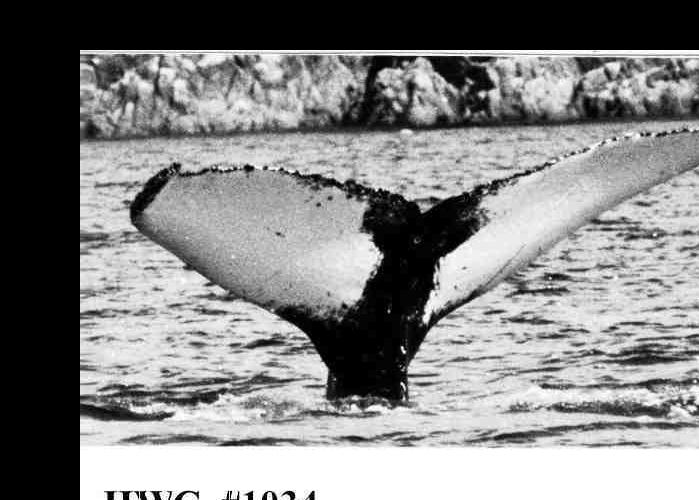

In [ ]:
img_path = 'train_whale_500/'+df.iloc[0]['Image']
img = cv2.imread(img_path,0)
rows,cols = img.shape
M = np.float32([[1,0,80],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols, rows))
cv2_imshow(dst)


In [ ]:
id=[]
im=[]
feature=[]
for i in range(1850):
  id.append(a1[()]['Id'][i])
  feature.append(np.array(a1[()]['sift'][i]))
  im.append(a1[()]['Image'][i])

In [9]:
train_labels=[]
train_feature1=[]
train_feature2=[]
train_feature3=[]
for i in range(1850):
    train_labels.append(a1[()]['Id'][i])
    train_feature1.append(np.array(a1[()]['sift'][i]))
    train_feature2.append(np.array(a1[()]['surf'][i]))
    train_feature3.append(np.array(a1[()]['orb'][i]))

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


print("[STATUS] feature vector size {}".format(np.array(train_feature1).shape))

print("[STATUS] training Labels {}".format(np.array(train_labels).shape))


targetNames = np.unique(train_labels)
le = LabelEncoder()
target = le.fit_transform(train_labels)
print("[STATUS] training labels encoded...")

from sklearn import linear_model

[STATUS] feature vector size (1850, 16448)
[STATUS] training Labels (1850,)
[STATUS] training labels encoded...


In [14]:
print(a1[()]['Id'][0])
print(a1[()]['sift'][0])
print(a2[()]['Id'][0])
print(a2[()]['sift'][0])

w_e15442c
[ 0.00000000e+00 -2.60208521e-18 -1.73472348e-16 ...  1.07382551e-08
  1.07382548e-08  1.07382547e-08]
w_e15442c
[-1.73472348e-18 -3.46944695e-18 -6.93889390e-18 ...  1.47727273e-08
  1.47727273e-08  1.47727270e-08]


In [32]:
from scipy.spatial import distance
# for i in range(100):
#     print(distance.hamming(a1[()]['surf'][i+200], a2[()]['surf'][i]))

distance.hamming(a1[()]['surf'][1], a2[()]['surf'][1])


0.9844961240310077

In [24]:
for i in range(100,200):
    print(a1[()]['Id'][i],a2[()]['Id'][i])
    print(distance.hamming(a1[()]['sift'][i], a2[()]['sift'][i]))

w_e59a1f0 w_e59a1f0
1.0
w_a8b5c0f w_a8b5c0f
1.0
w_a1b985a w_a1b985a
1.0
w_913a2ad w_913a2ad
1.0
w_511c464 w_511c464
1.0
w_d3c8520 w_d3c8520
1.0
w_6e8486d w_6e8486d
1.0
w_18df014 w_18df014
1.0
w_b074cdf w_b074cdf
1.0
w_96b8436 w_96b8436
1.0
w_656afeb w_656afeb
1.0
w_681dba6 w_681dba6
1.0
w_7049d9f w_7049d9f
1.0
w_cd22b23 w_cd22b23
1.0
w_0b3c02c w_0b3c02c
1.0
w_e8ca955 w_e8ca955
1.0
w_9b401eb w_9b401eb
1.0
w_fea7fe6 w_fea7fe6
1.0
w_e07f3d1 w_e07f3d1
1.0
w_1d2fbc1 w_1d2fbc1
1.0
w_8c1ec28 w_8c1ec28
1.0
w_da0b8b5 w_da0b8b5
1.0
w_ccca0db w_ccca0db
1.0
w_a4f77bd w_a4f77bd
1.0
w_711aaa1 w_711aaa1
1.0
w_9ae554b w_9ae554b
1.0
w_1274a11 w_1274a11
1.0
w_9dcf002 w_9dcf002
1.0
w_d88328d w_d88328d
1.0
w_125095f w_125095f
1.0
w_8b22583 w_8b22583
1.0
w_6b82ccc w_6b82ccc
1.0
w_9562910 w_9562910
1.0
w_1febbf3 w_1febbf3
1.0
w_3d0bc7a w_3d0bc7a
1.0
w_7ad249d w_7ad249d
1.0
w_cf3c233 w_cf3c233
1.0
w_eb8429c w_eb8429c
1.0
w_c11932e w_c11932e
1.0
w_c9e1cdc w_c9e1cdc
1.0
w_b8f8e69 w_b8f8e69
1.0
w_e3b2cfa w_e3b2

In [38]:
orb = cv2.ORB_create()

In [46]:
img_path = 'train_whale_500/'+train_df.iloc[0]['Image']
img = cv2.imread(img_path)
img = cv2.resize(img, fixed_size)
gray1= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp1, des1 = orb.detectAndCompute(gray1,None)
# img=cv2.drawKeypoints(gray,kp)
# plt.imshow(img)

In [47]:
img_path = 'test_data/'+test_df.iloc[0]['Image']
img = cv2.imread(img_path)
img = cv2.resize(img, fixed_size)
gray2= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp2, des2 = orb.detectAndCompute(gray2,None)

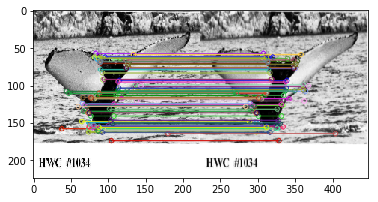

(<matplotlib.image.AxesImage at 0x1c54eb6048>, None)

In [55]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(gray1,kp1,gray2,kp2,matches[:90],None, flags=2)

plt.imshow(img3),plt.show()

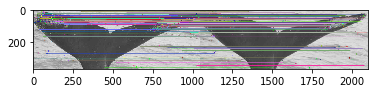

(<matplotlib.image.AxesImage at 0x1c4ce7bd68>, None)

In [67]:
sift = cv2.xfeatures2d.SIFT_create()
img_path = 'train_whale_500/'+train_df.iloc[2]['Image']
img = cv2.imread(img_path)

gray1= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp1, des1 = sift.detectAndCompute(gray1,None)
# img=cv2.drawKeypoints(gray,kp)
# plt.imshow(img)
img_path = 'test_data/'+test_df.iloc[2]['Image']
img = cv2.imread(img_path)

gray2= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp2, des2 = sift.detectAndCompute(gray2,None)



bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.45*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(gray1,kp1,gray2,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

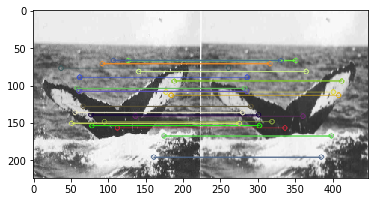

(<matplotlib.image.AxesImage at 0x1c4d63b978>, None)

In [73]:
surf = cv2.xfeatures2d.SURF_create()
img_path = 'train_whale_500/'+train_df.iloc[4]['Image']
img = cv2.imread(img_path)
img = cv2.resize(img, fixed_size)
gray1= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp1, des1 = surf.detectAndCompute(gray1,None)
# img=cv2.drawKeypoints(gray,kp)
# plt.imshow(img)
img_path = 'test_data/'+test_df.iloc[4]['Image']
img = cv2.imread(img_path)
img = cv2.resize(img, fixed_size)
gray2= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp2, des2 = surf.detectAndCompute(gray2,None)



bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.05*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(gray1,kp1,gray2,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

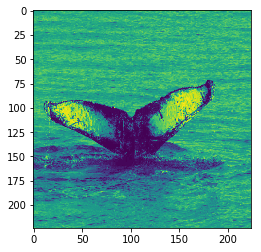

In [141]:
img_path = 'train_whale_500/'+train_df.iloc[8]['Image']
img = cv2.imread(img_path)
img = cv2.resize(img, fixed_size)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [250]:
sift = cv2.xfeatures2d.SURF_create()
kp, des = sift.detectAndCompute(gray,None)

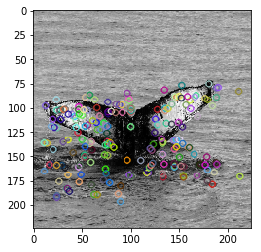

In [251]:
img=cv2.drawKeypoints(gray,kp[:200],None)
plt.imshow(img)

In [236]:
img_path = 'train_whale_500/'+train_df.iloc[740]['Image']
img = cv2.imread(img_path)
img = cv2.resize(img, fixed_size)

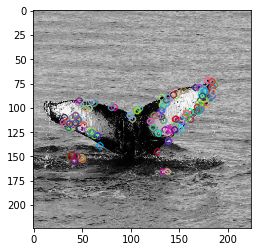

In [247]:
orb = cv2.ORB_create()
gray1= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp1, des1 = orb.detectAndCompute(gray1,None)
img=cv2.drawKeypoints(gray1,kp1[:200],None)
plt.imshow(img)

In [249]:
print(des1[:200])
print(des1[:200].shape)

[[191  16  99 ... 175 102 214]
 [128 148 159 ...   0 161 251]
 [126 217 122 ...  39  45 223]
 ...
 [121 245  25 ...  58  66  58]
 [209 151  63 ... 224 193  57]
 [ 41 220  53 ... 122  80 232]]
(200, 32)


In [267]:
train_df= pd.read_csv('train_500.csv')

In [303]:

train_df['Id'].value_counts().head(200)

w_1287fbc    34
w_98baff9    27
w_7554f44    26
w_1eafe46    23
w_fd1cb9d    22
w_693c9ee    22
w_73d5489    21
w_f19faeb    20
w_95874a5    19
w_9b401eb    19
w_dbda0d6    17
w_eb0a6ed    17
w_6c803bf    16
w_67de30b    16
w_a59905f    16
w_cae7677    15
w_b074cdf    14
w_8c1ec28    14
w_4b7b80b    13
w_6202983    13
w_9ea2cc3    13
w_fba3bde    13
w_f8e6546    13
w_bb2d34d    13
w_4e52a49    13
w_c9e1cdc    12
w_7c7a78c    12
w_2071a4c    12
w_b678944    12
w_b942708    11
             ..
w_0e7cb1c     3
w_307065e     3
w_bc62c0e     3
w_b2d937a     3
w_c926fc3     3
w_e156c87     3
w_9d5f5cc     3
w_3b5403b     3
w_d224115     3
w_5dc1c2d     3
w_ba53619     3
w_cd22b23     3
w_32037e2     3
w_a533837     3
w_b9c9129     3
w_6f580eb     3
w_25871da     3
w_5624f08     3
w_e158680     3
w_8201aa8     3
w_a91b997     3
w_3621c49     3
w_e6ec8ee     3
w_c13a4e3     3
w_f792125     3
w_0de84f0     3
w_da0b8b5     3
w_296749b     3
w_f546b0a     3
w_680e011     3
Name: Id, Length: 200, d